In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from utils import *
from models import MnistMLP
import numpy as np

log_to_stdout()

device = 'mps' if torch.backends.mps.is_available() \
    else 'cuda' if torch.cuda.is_available() \
    else 'cpu'
logging.info(f'using {device} device')
device = torch.device(device)

2022-11-17 21:32:33,194 INFO: using mps device


In [2]:
def example_plot(examples, name=None):
    n = len(examples)
    fig, axs = plt.subplots(n, 3, squeeze=False, figsize=(9, n*3))
    for i in range(n):
        x, y = examples[i]
        ax = axs[i]
        for j in range(3):
            ax[j].imshow(x.squeeze(), cmap='gray', vmin=0., vmax=1.)
            ax[j].set_title(y)
            ax[j].axis('off')
    plt.tight_layout()
    if name:
        plt.savefig(name+'.pdf')
    plt.show()

In [3]:
model = MnistMLP().to(device)
model.load_state_dict(torch.load('MnistMLP.pth', map_location=device), strict=True)
model.eval()

MnistMLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=256, out_features=10, bias=True)
  )
)

In [4]:
data = MNIST(root='data.nosync', train=False, transform=ToTensor())
dataloader = DataLoader(data, shuffle=True)

In [5]:
examples = adv_attack_standard(model, dataloader, 2, device)

2022-11-17 21:32:33,492 INFO: pgd attack reached max_iter
2022-11-17 21:32:33,645 INFO: pgd attack reached max_iter
2022-11-17 21:32:33,799 INFO: pgd attack reached max_iter
2022-11-17 21:32:33,960 INFO: pgd attack reached max_iter
2022-11-17 21:32:33,970 INFO: pgd attack successful after 2 iterations
2022-11-17 21:32:33,973 INFO: adversarial example found
2022-11-17 21:32:34,127 INFO: pgd attack reached max_iter
2022-11-17 21:32:34,279 INFO: pgd attack reached max_iter
2022-11-17 21:32:34,432 INFO: pgd attack reached max_iter
2022-11-17 21:32:34,582 INFO: pgd attack reached max_iter
2022-11-17 21:32:34,755 INFO: pgd attack reached max_iter
2022-11-17 21:32:34,922 INFO: pgd attack reached max_iter
2022-11-17 21:32:35,083 INFO: pgd attack reached max_iter
2022-11-17 21:32:35,243 INFO: pgd attack reached max_iter
2022-11-17 21:32:35,406 INFO: pgd attack reached max_iter
2022-11-17 21:32:35,558 INFO: pgd attack reached max_iter
2022-11-17 21:32:35,715 INFO: pgd attack reached max_iter
202

2022-11-17 21:32:53,580 INFO: pgd attack reached max_iter
2022-11-17 21:32:53,730 INFO: pgd attack reached max_iter
2022-11-17 21:32:53,880 INFO: pgd attack reached max_iter
2022-11-17 21:32:54,045 INFO: pgd attack reached max_iter
2022-11-17 21:32:54,199 INFO: pgd attack reached max_iter
2022-11-17 21:32:54,356 INFO: pgd attack reached max_iter
2022-11-17 21:32:54,367 INFO: pgd attack successful after 2 iterations
2022-11-17 21:32:54,369 INFO: adversarial example found
2022-11-17 21:32:54,534 INFO: pgd attack reached max_iter
2022-11-17 21:32:54,545 INFO: pgd attack successful after 2 iterations
2022-11-17 21:32:54,547 INFO: adversarial example found
2022-11-17 21:32:54,700 INFO: pgd attack reached max_iter
2022-11-17 21:32:54,864 INFO: pgd attack reached max_iter
2022-11-17 21:32:55,024 INFO: pgd attack reached max_iter
2022-11-17 21:32:55,181 INFO: pgd attack reached max_iter
2022-11-17 21:32:55,332 INFO: pgd attack reached max_iter
2022-11-17 21:32:55,489 INFO: pgd attack reached m

/Users/lukas/Documents/Mathematik/MSc Data Sc/DAP/source/utils.py:143: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = sm(logits)


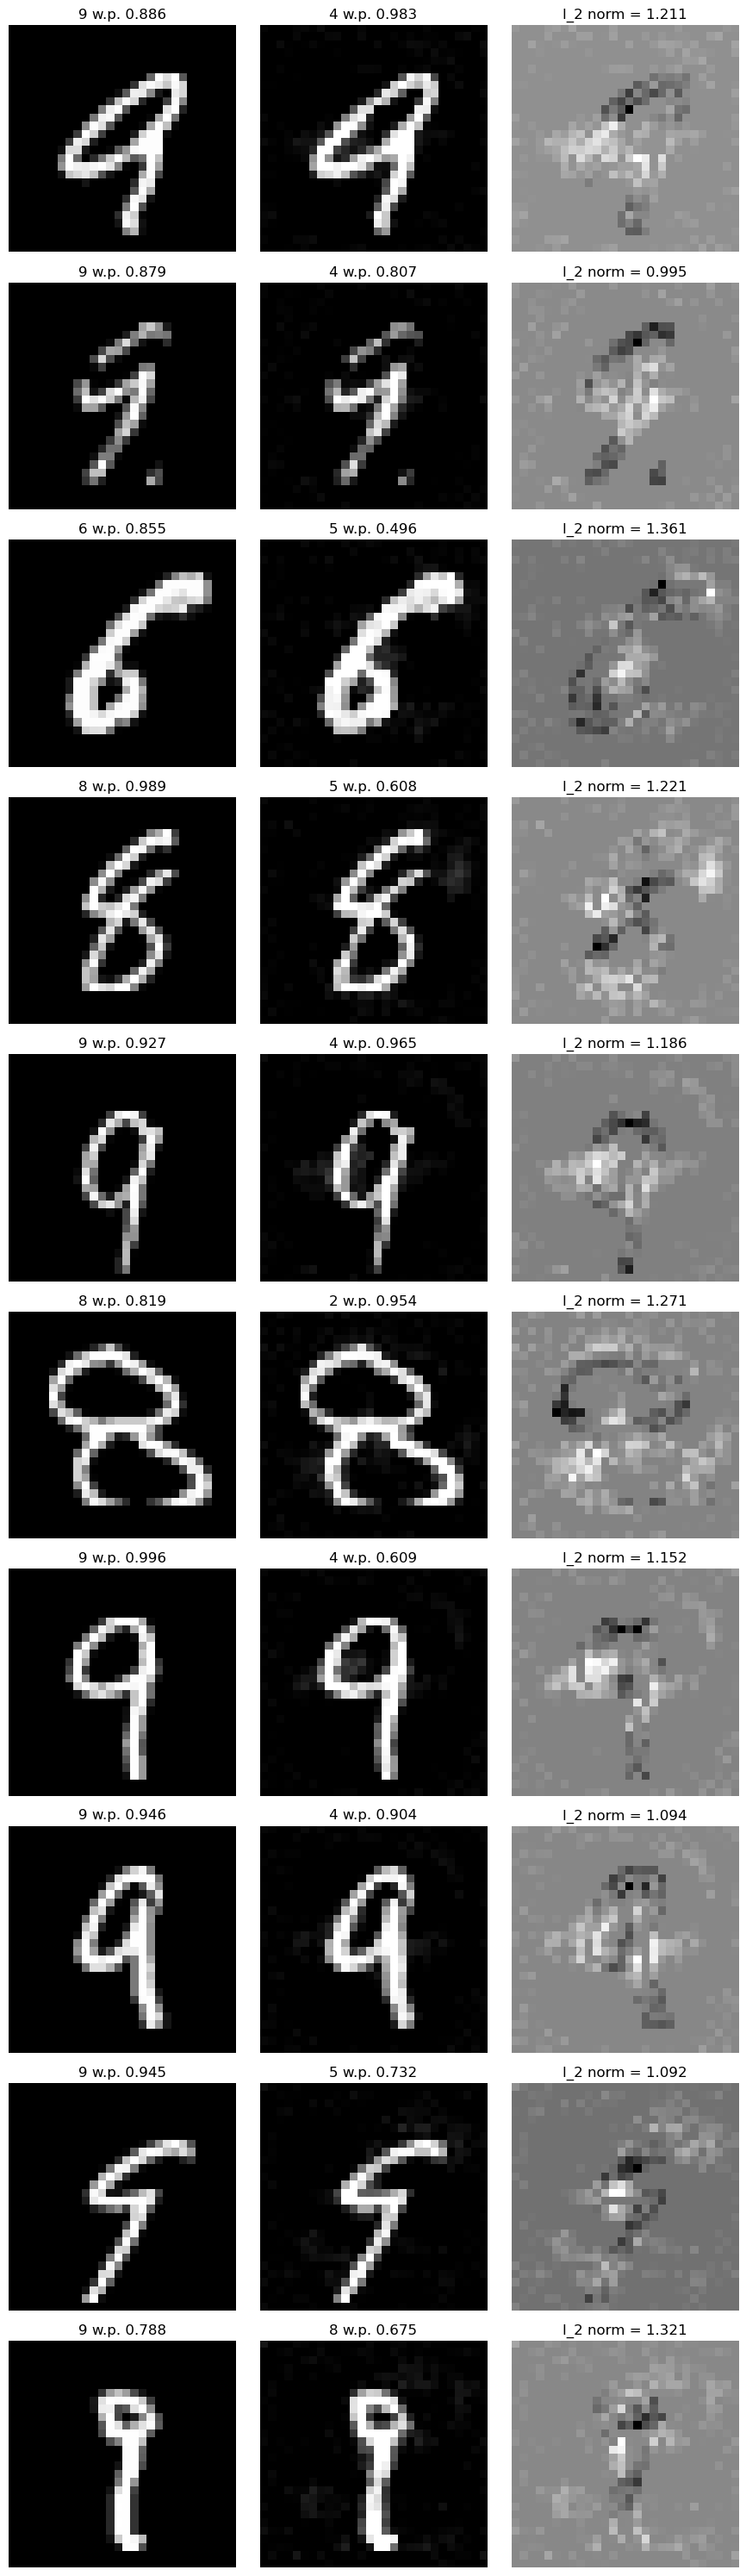

In [6]:
adv_example_plot(examples)